# Lab 3: Supervised Learning I - Regression Models

In this lab, we will cover the following topics:
1. Regression models for both continuous and binary outcomes:
    * Linear
    * Polynomial 
    * Logistic 
2. Apply regularization techniques to manage overfitting

Each section includes basic implementation and questions for further exploration.

## 1. Regression Models 
### 1.1 Linear Regression for Continuous Outcomes

We will start by implementing a linear regression model to predict continuous outcomes. We will also explore different parameters and visualize the results.

Mean Squared Error: 0.6536995137170016
R^2 Score: 0.8072059636181393


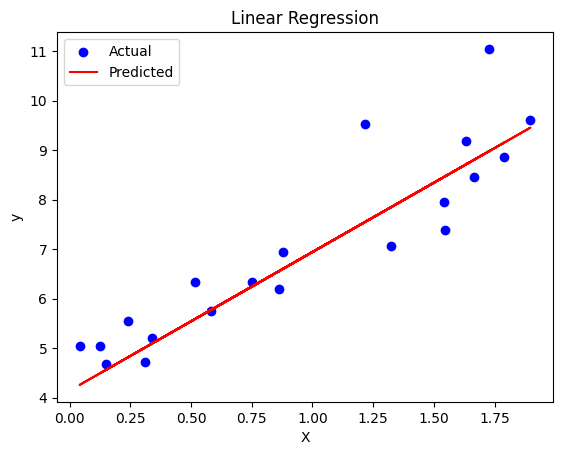

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [30]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

tol : float, default=1e-6
    The precision of the solution (`coef_`) is determined by `tol` which
    specifies a different convergence criterion for the `lsqr` solver.
    `tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` when
    fitting on sparse training da

### Questions for Exploration

1. How does changing the `test_size` parameter in the `train_test_split` function affect the model performance?
2. What happens to the model performance if you add noise to the data?
3. How does the model performance change if you use a different random seed for data generation?

### 1.2 Polynomial Regression for Continuous Outcomes

Next, we will implement a polynomial regression model to predict continuous outcomes. We will also explore different parameters and visualize the results.

Mean Squared Error: 0.6358406072820806
R^2 Score: 0.8175001857285947


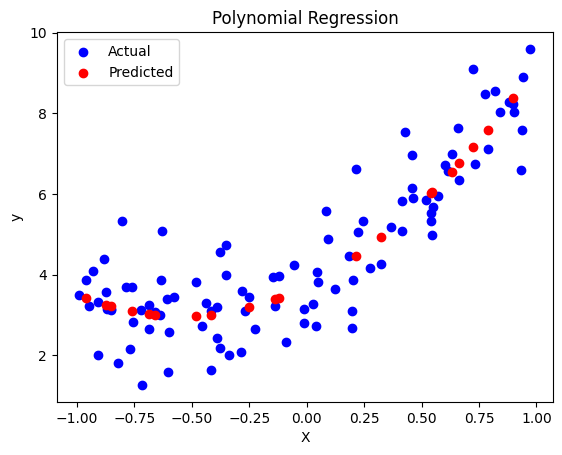

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)

# Transform the data to include polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = poly_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [43]:
PolynomialFeatures?

Init signature:
PolynomialFeatures(
    degree=2,
    *,
    interaction_only=False,
    include_bias=True,
    order='C',
)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Read more in the :ref:`User Guide <polynomial_features>`.

Parameters
----------
degree : int or tuple (min_degree, max_degree), default=2
    If a single int is given, it specifies the maximal degree of the
    polynomial features. If a tuple `(min_degree, max_degree)` is passed,
    then `min_degree` is the minimum and `max_degree` is the maximum
    polynomial degree of the generated features. Note that `min_degree=0`
    and `min_degree=1` are equivalent as outputting the degree zero term is
    determined by `include_bi

### Questions for Exploration

1. How does changing the degree of the polynomial features affect the model performance?
2. What happens to the model performance if you add higher-degree polynomial features?
3. How does the model performance change if you use a different random seed for data generation?

### 1.3 Logistic Model for Binary Outcomes

Next, we will implement a logistic regression model to predict binary outcomes. We will also explore different parameters and visualize the results.

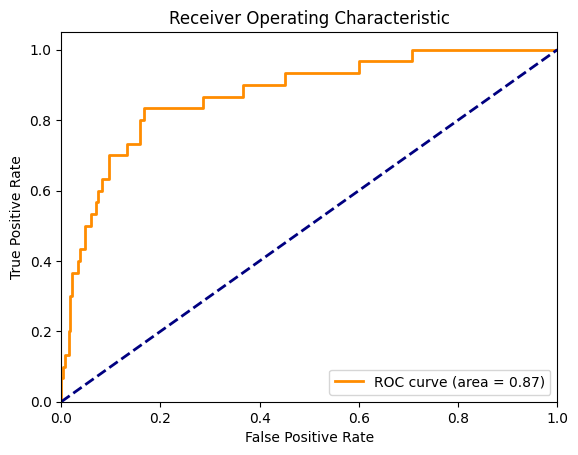

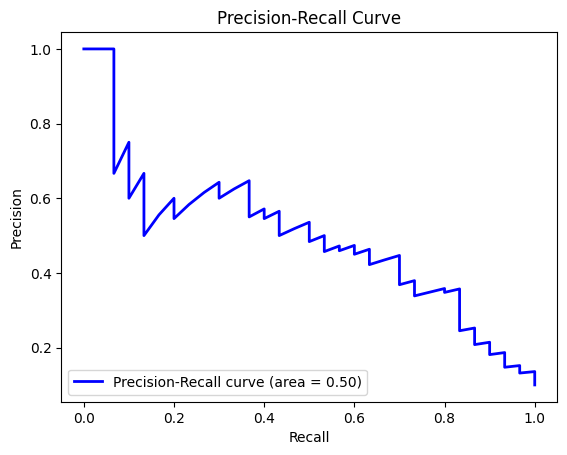

In [48]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [52]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='deprecated',
    *,
    C=1.0,
    l1_ratio=0.0,
    dual=False,
    tol=0.0001,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    verbose=0,
    warm_start=False,
    n_jobs=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using a set of available
solvers. **Note that regularization is applied by default**. It can handle both
dense and sparse input `X`. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted (and
copied).

The solvers 'lbfgs', 'newton-cg', 'newton-cholesky' and 'sag' support only L2
regularization with primal formulation, or no regularization. The 'liblinear'
solver supports both L1 and L2 regularization (but not both, i.e. elastic-net),
with a dual formulation only for the L2 penalt

### Questions for Exploration

1. How does changing the `C` parameter in the `LogisticRegression` model affect the model performance?
2. What happens to the ROC curve and AUC score when you change the class weights?
3. How does the model performance change if you use a different random seed for data generation?

## 2 Regularization Techniques to Manage Overfitting

Finally, we will apply regularization techniques such as Ridge and Lasso regression to manage overfitting. We will also explore different parameters and visualize the results.

Ridge Regression - Mean Squared Error: 0.647613237305426, R^2 Score: 0.8090009745846479
Lasso Regression - Mean Squared Error: 0.6584189249611411, R^2 Score: 0.8058140789310452


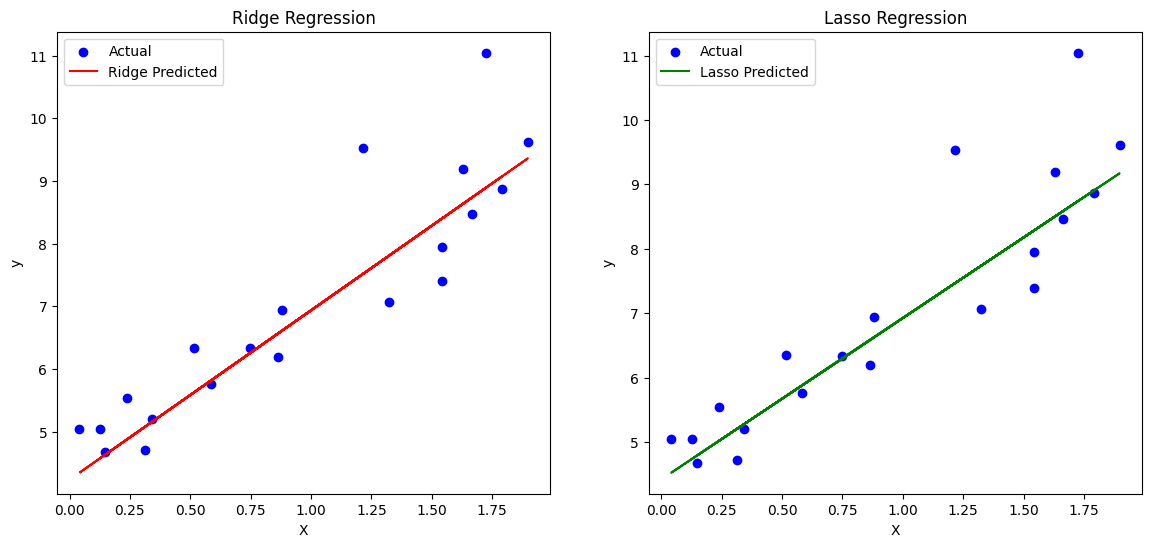

In [55]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Train a Lasso regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

# Plot the results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='red', label='Ridge Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression')
plt.legend()

plt.show()


In [57]:
Ridge?
Lasso?

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to ordinary least
    squares, solved by the :class:`LinearRegression` object. For numerical
    reasons, using `alpha = 0` with the `Lasso` object is not advised.

### Questions for Exploration

1. How does changing the `alpha` parameter in the `Ridge` and `Lasso` models affect the model performance?
2. What happens to the model performance if you use different values of `alpha`?
3. Try implementing an `ElasticNet` model in the cell above.
    * How does it compare to the `Ridge` and `Lasso` models?
    * How does changing `alpha` affect the model performance? 
4. How does the model performance change if you use a different random seed for data generation?

## Extensions

1. Create new features from the existing ones (e.g., interaction terms, polynomial features) and evaluate their impact on model performance.
2. How does feature scaling (e.g., standardization, normalization) affect the performance of linear, polynomial, and logistic models?
3. Compare the performance of linear, polynomial, and logistic models on the same dataset using various evaluation metrics (e.g., R^2, MSE, ROC AUC).